In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
pd.__version__

# Style 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df_labels = pd.read_csv('labels.txt',sep='\n', delimiter=',', header=None )

# Function to remove dublicates from labels.

In [3]:
def uniquify(df_columns):
    df_columns = df_columns.T.iloc[0,:]
    seen = list()

    for item in df_columns:
        fudge = 'hand'
        newitem = item
        
        if newitem in seen:
            newitem = "{}_{}".format(item, fudge)

        seen.append(newitem)
    return seen
        
label_list = uniquify(df_labels)
display(label_list)

['Subject index (1-40)',
 'ECG_original_mean',
 'ECG_original_std',
 'ECG_original_trimmean25',
 'ECG_original_median',
 'ECG_original_skewness',
 'ECG_original_kurtosis',
 'ECG_original_max',
 'ECG_original_min',
 'ECG_original_prctile25',
 'ECG_original_prctile75',
 'ECG_original_geomean(abs)',
 'ECG_original_harmmean',
 'ECG_original_mad',
 'ECG_original_baseline',
 'ECG_RR_window_mean',
 'ECG_RR_window_std',
 'ECG_RR_window_trimmean25',
 'ECG_RR_window_median',
 'ECG_RR_window_skewness',
 'ECG_RR_window_kurtosis',
 'ECG_RR_window_max',
 'ECG_RR_window_min',
 'ECG_RR_window_prctile25',
 'ECG_RR_window_prctile75',
 'ECG_RR_window_geomean(abs)',
 'ECG_RR_window_harmmean',
 'ECG_RR_window_mad',
 'ECG_RR_window_baseline',
 'ECG_amplitude_RR_mean',
 'ECG_amplitude_RR_std',
 'ECG_amplitude_RR_trimmean25',
 'ECG_amplitude_RR_median',
 'ECG_amplitude_RR_skewness',
 'ECG_amplitude_RR_kurtosis',
 'ECG_amplitude_RR_max',
 'ECG_amplitude_RR_min',
 'ECG_amplitude_RR_prctile25',
 'ECG_amplitude_R

In [4]:
df = pd.read_csv('data.txt', header=None, names=label_list, na_values = 'N/A')#, set_flags(allows_duplicate_labels=False))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [6]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,.0f
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,.0f
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,.0f
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,.0f
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,.0f


# Changing the label col from object to numbers.

In [7]:
df.iloc[:,-1].unique()
# array(['\x01.0f', '\x03.0f', '\x02.0f', '\x04.0f'], dtype=object)

for index, rows in df.iterrows():
    if df.loc[index, 'Activity'] == '\x01.0f':
        df.loc[index, 'Activity'] = 1
    elif df.loc[index, 'Activity'] == '\x02.0f':
        df.loc[index, 'Activity'] = 2
    elif df.loc[index, 'Activity'] == '\x03.0f':
        df.loc[index, 'Activity'] = 3
    elif df.loc[index, 'Activity'] == '\x04.0f':
        df.loc[index, 'Activity'] = 4

# Checking for NA

In [8]:
for col in range(df.shape[1]):
    # YOUR CODE HERE
    n_miss = df.isnull().sum(axis=0)
    print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))
# No NA in dataset.

Column 0 has 0 missing values.
Column 1 has 0 missing values.
Column 2 has 0 missing values.
Column 3 has 0 missing values.
Column 4 has 0 missing values.
Column 5 has 0 missing values.
Column 6 has 0 missing values.
Column 7 has 0 missing values.
Column 8 has 0 missing values.
Column 9 has 0 missing values.
Column 10 has 0 missing values.
Column 11 has 0 missing values.
Column 12 has 0 missing values.
Column 13 has 0 missing values.
Column 14 has 0 missing values.
Column 15 has 0 missing values.
Column 16 has 0 missing values.
Column 17 has 0 missing values.
Column 18 has 0 missing values.
Column 19 has 0 missing values.
Column 20 has 0 missing values.
Column 21 has 0 missing values.
Column 22 has 0 missing values.
Column 23 has 0 missing values.
Column 24 has 0 missing values.
Column 25 has 0 missing values.
Column 26 has 0 missing values.
Column 27 has 0 missing values.
Column 28 has 0 missing values.
Column 29 has 0 missing values.
Column 30 has 0 missing values.
Column 31 has 0 mi

* Do we have to normalize all data?

# Summary statistics: 

* The first column correspond to the index of the subject. 
* The next 174 attributes are statistics extracted from the ECG signal. 
* The next 151 attributes are features extracted from the TEB signal. 
* The next 104 attributes come from the EDA measured in the arm.
* The next 104 ones from the EDA in the hand. 
* The last attribute is the pattern class, that is, the corresponding activity: 1-neutral, 2-emotional, 3-mental and 4-physical.

Idear:
 * Group by subject
 * Group by Activity 
 * https://www.youtube.com/watch?v=BJ-FIGzKEaA
 * https://www.youtube.com/watch?v=lUI6VMj43PE&ab_channel=KGPTalkie
 

In [9]:
df.groupby(['Subject index (1-40)', 'Activity']).count().iloc[1]

ECG_original_mean                               28
ECG_original_std                                28
ECG_original_trimmean25                         28
ECG_original_median                             28
ECG_original_skewness                           28
                                                ..
EDA_Functionals_power_Filt2prctile75_hand       28
EDA_Functionals_power_Filt2geomean(abs)_hand    28
EDA_Functionals_power_Filt2harmmean_hand        28
EDA_Functionals_power_Filt2mad_hand             28
EDA_Functionals_power_Filt2baseline_hand        28
Name: (1, 2), Length: 533, dtype: int64

ECG_original_mean  ECG_original_std  \
Subject index (1-40) Activity                                        
1                    1                        28                28   
                     2                        28                28   
                     3                        28                28   
                     4                        28                28   
2                    1                        28                28   
...                                          ...               ...   
39                   4                        28                28   
40                   1                        28                28   
                     2                        28                28   
                     3                        28                28   
                     4                        28                28   

                               ECG_original_trimmean25  ECG_original_median  \
Subject index (1-40) Activity                                                 
1                    1                              28                   28   
                     2                              28                   28   
                     3                              28                   28   
                     4                              28                   28   
2                    1                              28                   28   
...                                                ...                  ...   
39                   4                              28                   28   
40                   1                              28                   28   
                     2                              28                   28   
                     3                              28                   28   
                     4                              28                   28   

                               ECG_original_skewness  ECG_original_kurtosis  \
Subject index (1-40) Activity                                                 
1                    1                            28                     28   
                     2                            28                     28   
                     3                            28                     28   
                     4                            28                     28   
2                    1                            28                     28   
...                                              ...                    ...   
39                   4                            28                     28   
40                   1                            28                     28   
                     2                            28                     28   
                     3                            28                     28   
                     4                            28                     28   

                               ECG_original_max  ECG_original_min  \
Subject index (1-40) Activity                                       
1                    1                       28                28   
                     2                       28                28   
                     3                       28                28   
                     4                       28                28   
2                    1                       28                28   
...                                         ...               ...   
39                   4                       28                28   
40                   1                       28                28   
                     2                       28                28   
                     3                       28                28   
                     4                       28                28   

                               ECG_original_prctile25  ECG_original_prctile75  \
Subject index (1-40) Activity                                                   
1   

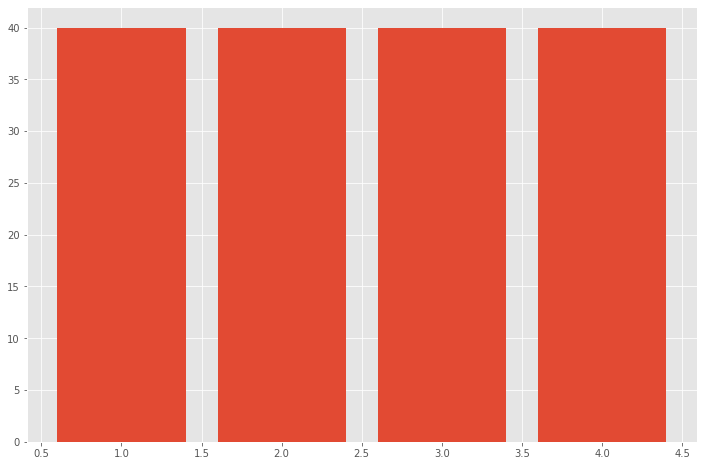

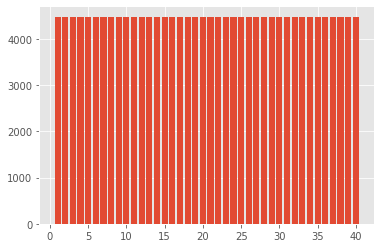

In [10]:
# plt.hist(df.iloc[:,-1], bins=1)
# plt.show()
# plt.hist(df['Subject index (1-40)'], bins=1)
# plt.show()

num_in_group = df.groupby(['Subject index (1-40)', 'Activity']).count()
display(num_in_group)
plt.figure(figsize=(12,8))
plt.bar(df['Activity'], df['Subject index (1-40)'] )
plt.show()
plt.bar(df['Subject index (1-40)'], df['Activity'].count() )
plt.show()
# There is 28 obs for each activity for each person. There are 40 persons, 28*40 = 1120 rows in each Activity.

In [11]:
mean_list = list([col for col in df.columns if "mean" in col])
median_list = list([col for col in df.columns if "median" in col])

# Visualization:

In [12]:
df_dummy = pd.get_dummies(df, columns=["Activity"])

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:,1:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


In [15]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)


In [16]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_scaled,y_train)

In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

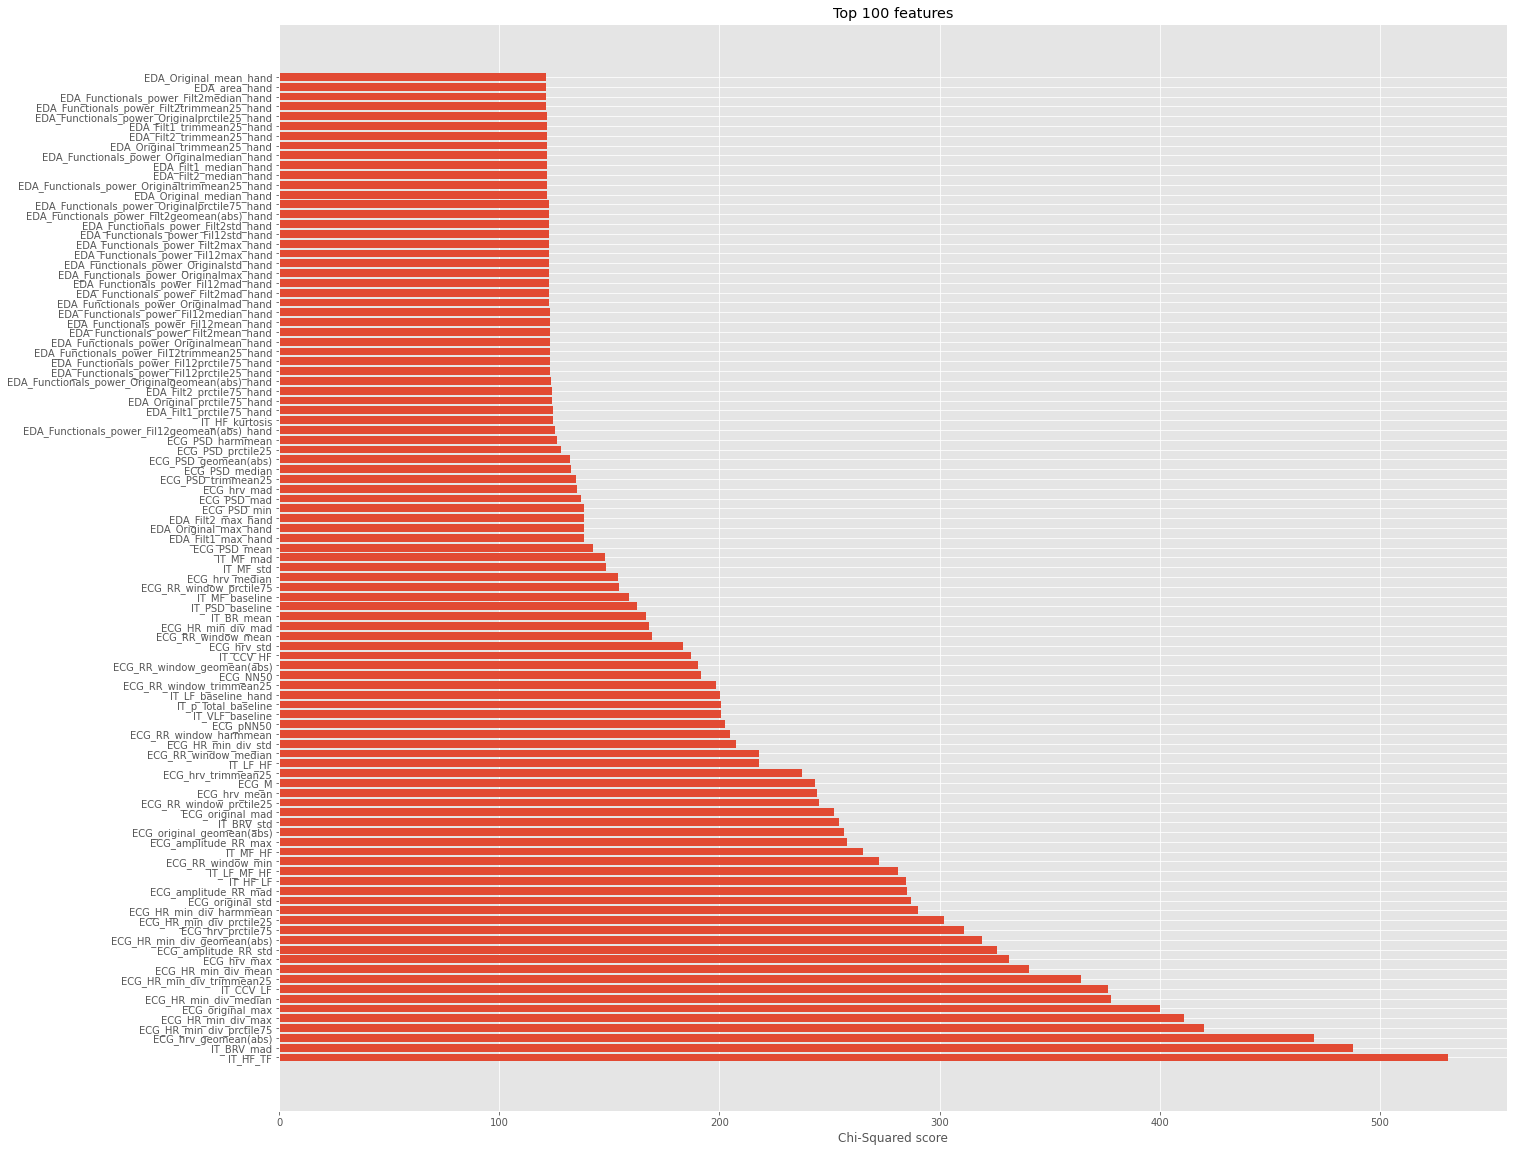

In [18]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

top_100 = featureScores.sort_values('Score', ascending=False)

good_score = top_100.iloc[0:101,:]
plt.figure(figsize= ( 22 , 20))
plt.barh(good_score['Specs'], good_score['Score'])
#plt.xticks(rotation=90)
plt.xlabel('Chi-Squared score')
plt.title('Top 100 features')
plt.show()

# Feature Importance

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train_scaled,y_train)

ExtraTreesClassifier()

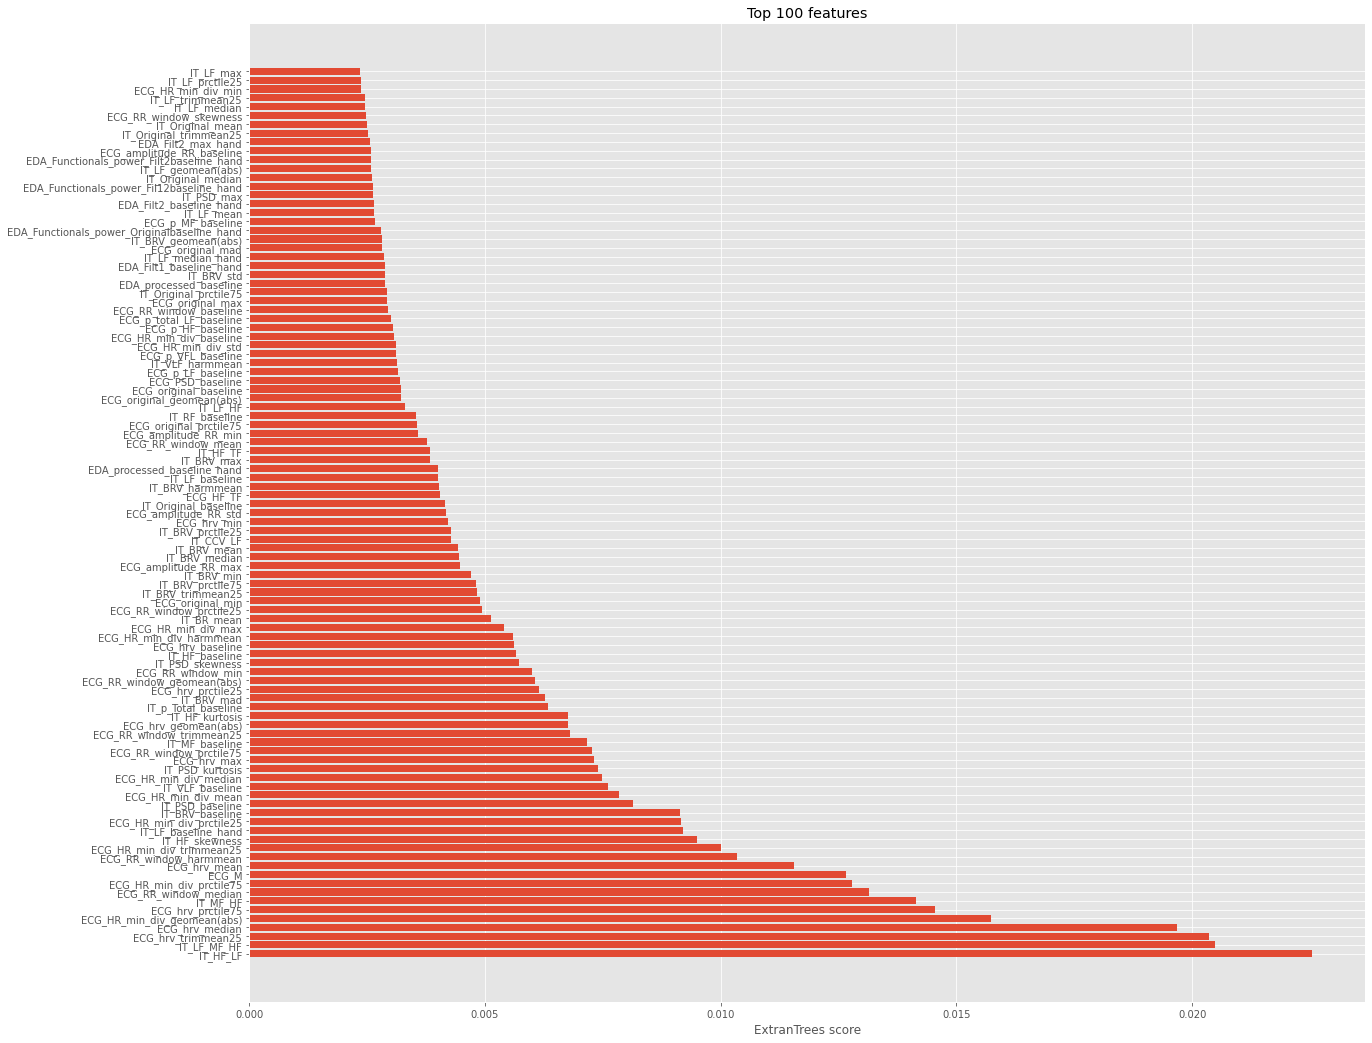

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)#use inbuilt class feature_importances of tree based classifiers
feat_importances_100 = feat_importances.sort_values(ascending=False).iloc[0:101]

plt.figure(figsize=(20,18))
plt.barh(feat_importances_100.index, feat_importances_100)
plt.xlabel('ExtranTrees score')
plt.title('Top 100 features')
plt.show()

# Correlation matrix

In [21]:
corrMatrix = np.corrcoef(X_train_scaled)
# top_coor_100 = corrMatrix
display(corrMatrix.shape)

(3360, 3360)

In [22]:
# Filter it somehow to get top correlatons. HOW??

X_ts = pd.DataFrame(data=X_train_scaled, index=None,columns=None)
# corrmat = X_ts.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(40,40))
# #plot heat map
# sns.heatmap(X_ts[top_corr_features].corr(),annot=True,cmap="RdYlGn")

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_yscale'

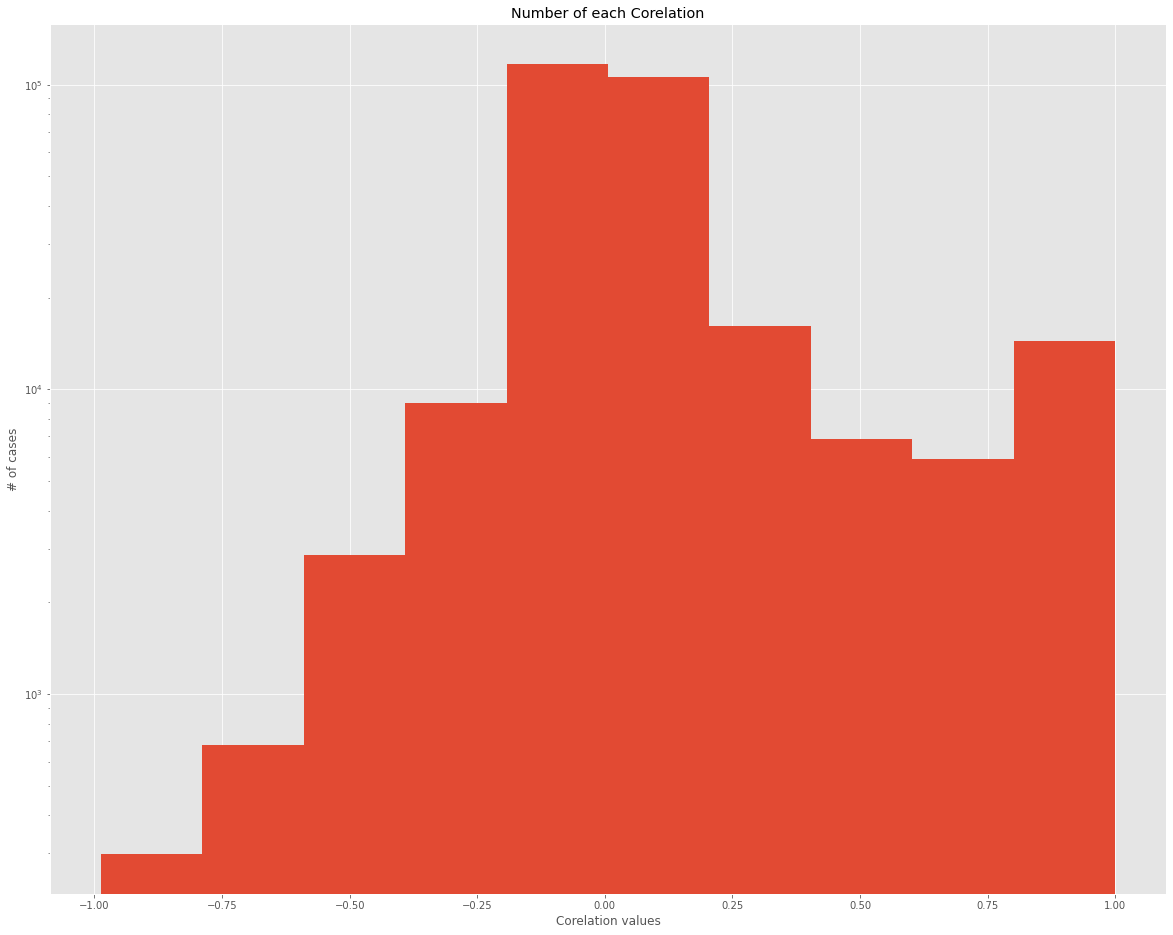

In [36]:
corr_val=0.01
X_ts_2 = X_ts.corr().unstack().reset_index()
X_ts_2 = X_ts_2.loc[X_ts_2['level_0'] != X_ts_2['level_1']].sort_values(by=0, ascending=False)

X_ts_2.hist(0, log=True, figsize = (20,16))
plt.xlabel("Corelation values")
plt.ylabel("# of cases")
plt.title("Number of each Corelation")
plt.set_yscale('function', functions= lambda x: 10**(x))

In [24]:
num_cor = X_ts_2.iloc[:,2].value_counts()
display(num_cor.shape)
#rg = np.arange(-1,1,0.01)

# plt.bar(x=X_ts_2.iloc[:,2].value_counts().index, y=X_ts_2.iloc[:,2].value_counts())
# plt.show()

(133387,)